In [18]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [266]:
root = tk.Tk()
root.lift()
root.withdraw()
file_dir = filedialog.askdirectory(title='Connectome Directory')

In [267]:
#Note: this notebook generates figures the rely on the data being from one region to everywhere else.
# ROI lists should be related as they will be combined into one region
subject = np.loadtxt(file_dir + '/connectome_matrix.csv', delimiter=',')
mu = np.loadtxt(file_dir + '/sift2_mu.txt')
with open('Z:\Dropbox (UFL)\DataProcessing\Pipeline Code\Bash\Freesurfer\hcpmmp1_subcortex.txt','r') as f:
    labels = []
    for line in f:
        if line.startswith('#') or len(line) < 10:
            continue
        else:
            labels.append(line.split()[1])
            
#***********Place regions of interest here, NOTE: Use labelmap values as they are************
ROI_list_left = [371]
ROI_list_right = [372]            
            
data = subject[1:,1:] #Remove unassigned tracts
ROI_list_left = np.array([ROI_list_left]) - 1 #to deal with starting at 1,
ROI_list_right = np.array([ROI_list_right]) - 1
data_left = data[:,ROI_list_left]
data_right = data[:,ROI_list_right]

data_left_sum = np.sum(data_left,axis=1) #collapse all regions
data_right_sum = np.sum(data_right,axis=1)

data = np.column_stack((data_left_sum,data_right_sum))
data_weighted = data * mu #"Fudge Factor"
data_norm = data_weighted
#data_norm = data_weighted / np.sum(data_weighted)

ROI_left = data_norm[:,0]
ROI_right = data_norm[:,1]
ROI_left[ROI_list_left] = np.NAN #Remove regions from connectivity output
ROI_right[ROI_list_right] = np.NAN

percent = 100 #top k percentage of connections, not implemented at the moment
top = percent/100
Index_left = np.argsort(ROI_left) #Sort indicies and remove nan values
Index_left = Index_left[np.argwhere(~np.isnan(ROI_left[Index_left]))].squeeze()[::-1]
Index_right = np.argsort(ROI_right)
Index_right = Index_right[np.argwhere(~np.isnan(ROI_right[Index_right]))].squeeze()[::-1]

#ROI_left_top = ROI_left[Index_left[Index_left < 360]]
ROI_left_top = ROI_left[Index_left]
ROI_right_top = ROI_right[Index_right]
labels_left = np.array(labels)[Index_left[Index_left < len(labels)]]
labels_right = np.array(labels)[Index_right[Index_right < len(labels)]]

with open(file_dir + '/labels_left.txt','w') as f:
    count = 0
    for label in labels_left:
        print(label,Index_left[count]+1,ROI_left_top[count],file=f)
        count += 1
with open(file_dir + '/labels_right.txt','w') as f:
    count = 0
    for label in labels_right:
        print(label,Index_right[count]+1,ROI_right_top[count],file=f)
        count += 1    

In [49]:
labels_left

array(['L_Caudate', 'L_4', 'L_Putamen', 'L_6ma', 'L_6mp', 'L_Hippocampus',
       'L_45', 'L_a47r', 'R_8BM', 'R_SCEF', 'L_Pallidum', 'R_9m', 'L_3b',
       'R_SFL', 'L_6d', 'L_SCEF', 'L_SFL', 'R_Caudate', 'L_V1', 'L_1',
       'L_p47r', 'R_8BL', 'L_47l', 'L_3a', 'R_4', 'R_Putamen', 'L_V2',
       'R_24dd', 'L_8BL', 'L_POS2', 'L_IFSa', 'L_6v', 'L_V3', 'R_d32',
       'L_8BM', 'L_10d', 'R_10d', 'L_7Am', 'R_5L', 'L_V3A', 'R_6d',
       'R_9-46d', 'R_p10p', 'R_POS2', 'R_6r', 'R_9a', 'R_6v', 'R_a32pr',
       'R_p32pr', 'R_6ma', 'L_6a', 'L_p10p', 'L_PCV', 'R_8Av', 'R_6mp',
       'L_5L', 'R_7Pm', 'R_FEF', 'L_6r', 'R_i6-8', 'R_9p', 'L_Amygdala',
       'L_9m', 'L_43', 'R_8Ad', 'R_7m', 'L_RSC', 'R_5mv', 'R_7Am', 'L_44',
       'L_7AL', 'L_7m', 'R_7PL', 'R_Pallidum', 'R_5m', 'R_RSC', 'L_9a',
       'L_7Pm', 'L_a9-46v', 'R_Hippocampus', 'R_PFm', 'R_55b', 'L_V6A',
       'R_s6-8', 'L_s6-8', 'L_TGd', 'L_PF', 'L_9p', 'L_2', 'L_24dd',
       'R_VIP', 'L_PoI2', 'L_V4', 'R_7AL', 'R_8C', 'R_6a', 'R_A4

In [268]:
root = tk.Tk()
root.lift()
root.withdraw()
file_path_1 = filedialog.askopenfilename(title='Left Labels')

root = tk.Tk()
root.lift()
root.withdraw()
file_path_2 = filedialog.askopenfilename(title='Right Labels')
# file_path_1 = file_dir + '/labels_left.txt'
# file_path_2 = file_dir + '/labels_right.txt'

In [251]:
f = open(file_path_1,'r')
connectome_1 = f.readlines()
f.close()

f = open(file_path_2,'r')
connectome_2 = f.readlines()
f.close()

shared = []
conn_1 = []
conn_2 = []
count = 0
for region in connectome_1:
    if region in connectome_2:
        shared.append(region.split()[0])
    else:
        conn_1.append(region.split()[0])

for region in connectome_2:
    if region in connectome_1:
        continue
    else:
        conn_2.append(region.split()[0])

print('Shared',len(shared),'\n',shared,'\n')

Shared 16 
 ['L_31pv', 'L_a24pr', 'L_a24', 'L_13l', 'L_OP2-3', 'L_VMV1', 'L_PHA2', 'L_s32', 'L_pOFC', 'L_Ig', 'R_PHA3', 'R_TE2p', 'R_FST', 'R_Ig', 'R_TGv', 'R_PI'] 



In [252]:
connectome_regions = {
    'Primary Visual Cortex': ['V1'],
    'Early Visual Cortex': ['V2','V3','V4'],
    'Dorsal Stream Visual Cortex': ['V3A','V3B','V7','V6','V6A','IPS1'],
    'Ventral Stream Visual Cortex': ['V8','VVC','VMV1','VMV2','VMV3','PIT','FFC'],
    'MT+ Complex and Neighboring Visual Areas': ['V3CD','LO1','LO2','LO3','MT','MST','V4t','FST','PH'],
    'Somatosensory and Motor Cortex': ['4','3b','3a','5m','1','2'],
    'Paracentral Lobular and Mid Cingulate Cortex': ['5L','5m','5mv','24dd','24dv','6mp','6ma','SCEF'],
    'Premotor Cortex': ['6a','6d','FEF','PEF','55b','6v','6r'],
    'Posterior Opercular Cortex': ['43','FOP1','OP4','OP2-3','OP1','PFcm'],
    'Early Auditory Cortex': ['A1','MBelt','LBelt','PBelt','RI'],
    'Auditory Association Cortex': ['A4','A5','STSdp','STSda','STSvp','STSva','TA2','STGa'],
    'Insular and Frontal Opercular Cortex': ['52','PI','Ig','PoI1','PoI2','FOP2','Pir','AAIC','MI','FOP3','FOP4','FOP5','AVI'],
    'Medial Temporal Cortex': ['H','PreS','EC','PeEc','PHA1','PHA2','PHA3'],
    'Lateral Temporal Cortex': ['TGd','TGv','TF','TE2p','TE2a','TE1a','TE1m','TE1p','PHT'],
    'Temporo-Parieto-Occipital Junction': ['TPOJ2','TPOJ3','TPOJ1','STV','PSL'],
    'Superior Parietal Cortex': ['MIP','LIPv','VIP','LIPd','AIP','7PC','7Am','7AL','7Pm','7PL'],
    'Inferior Parietal Cortex': ['PGp','IP0','IP1','IP2','PF','PFt','PFop','PFm','PGi','PGs'],
    'Posterior Cingulate Cortex': ['DVT','ProS','POS2','POS1','RSC','7m','PCV','v23ab','d23ab','31pv','31pd','31a','23d','23c'],
    'Anterior Cingulate and Medial Prefrontal Cortex': ['33pr','a24pr','p24pr','p24','a24','p32pr','a32pr','d32','p32','s32','8BM','9m','10r','10v','25'],
    'Orbital and Polar Frontal Cortex': ['OFC','pOFC','13l','11l','47s','47m','a47r','10pp','a10p','p10p','10d'],
    'Inferior Frontal Cortex': ['44','45','47l','IFJp','IFJa','IFSp','IFSa','p47r'],
    'DorsoLateral Prefrontal Cortex': ['SFL','s6-8','i6-8','8BL','8Ad','8Av','8C','9p','9a','9-46d','46','a9-46v','p9-46v']
}

region_len = 0
for test in connectome_regions.keys():
    region_len = region_len + len(connectome_regions[test])
print(region_len)

181


In [253]:
PatientID = "C102"
region_connectivity = {
    'Patient ID': PatientID,
    'Hemisphere': "",
    'Primary Visual Cortex': 0,
    'Early Visual Cortex': 0,
    'Dorsal Stream Visual Cortex': 0,
    'Ventral Stream Visual Cortex': 0,
    'MT+ Complex and Neighboring Visual Areas': 0,
    'Somatosensory and Motor Cortex': 0,
    'Paracentral Lobular and Mid Cingulate Cortex': 0,
    'Premotor Cortex': 0,
    'Posterior Opercular Cortex': 0,
    'Early Auditory Cortex': 0,
    'Auditory Association Cortex': 0,
    'Insular and Frontal Opercular Cortex': 0,
    'Medial Temporal Cortex': 0,
    'Lateral Temporal Cortex': 0,
    'Temporo-Parieto-Occipital Junction': 0,
    'Superior Parietal Cortex': 0,
    'Inferior Parietal Cortex': 0,
    'Posterior Cingulate Cortex': 0,
    'Anterior Cingulate and Medial Prefrontal Cortex': 0,
    'Orbital and Polar Frontal Cortex': 0,
    'Inferior Frontal Cortex': 0,
    'DorsoLateral Prefrontal Cortex': 0,
}
left_region = region_connectivity.copy()
left_region["Hemisphere"] = "Left"
right_region = region_connectivity.copy()
right_region["Hemisphere"] = "Right"
left_leftover = connectome_1.copy()
right_leftover = connectome_2.copy()

for key in connectome_regions.keys():
    for region in connectome_1:
        if region.split()[0].split('_')[-1] in connectome_regions[key]:
            region_connectivity[key] = region_connectivity[key] + float(region.split()[-1].split('\n')[0])
            left_region[key] = left_region[key] + float(region.split()[-1].split('\n')[0])
            try:
                left_leftover.remove(region)
            except:
                continue
                
for region in left_leftover:
    keyname = region.split()[0].split('_')[-1]
    try:
        left_region[keyname] = left_region[keyname] + float(region.split()[-1].split('\n')[0])
    except:
        left_region[keyname] = float(region.split()[-1].split('\n')[0])
                
for key in connectome_regions.keys():
    for region in connectome_2:
        if region.split()[0].split('_')[-1] in connectome_regions[key]:
            region_connectivity[key] = region_connectivity[key] + float(region.split()[-1].split('\n')[0])
            right_region[key] = right_region[key] + float(region.split()[-1].split('\n')[0])
            try:
                right_leftover.remove(region)
            except:
                continue
                
for region in right_leftover:
    keyname = region.split()[0].split('_')[-1]
    try:
        right_region[keyname] = right_region[keyname] + float(region.split()[-1].split('\n')[0])
    except:
        right_region[keyname] = float(region.split()[-1].split('\n')[0])
        
all_data = region_connectivity


padding = ' ' * 35
filepath = file_path_1.split('labels')[0]
with open(filepath + 'Region_connectivity.txt', 'w') as f:
    for k,v in all_data.items():
        print('{:.50s} {}'.format(k + padding,v), file=f)
'''
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0,0,1,1])

barwidth = 0.8
y_pos = np.arange(len(left_region.keys()))*2

left_bar = ax.barh(y_pos,left_region.values(),barwidth)
right_bar = ax.barh(y_pos+barwidth, right_region.values(),barwidth)

ax.set_yticks(y_pos+(barwidth / 2),labels=left_region.keys(), fontsize=20)
ax.invert_yaxis()
ax.set_xlabel('Connectivity', fontsize=20)
ax.set_xticks(np.arange(0,0.6,0.1))
ax.tick_params(axis='x',labelsize=20)
ax.set_title('HCP Connectome Regions', fontsize=20)
ax.legend((left_bar[0],right_bar[0]),('Left','Right'),fontsize=20)
ax.spines['left'].set_zorder(ax.yaxis.get_label().get_zorder()-1)
plt.show()

fig.savefig(filepath+'Left_right.png',dpi=400,bbox_inches='tight',facecolor='w')
'''

region_both = {'Region': left_region.keys(),'Left': left_region.values(), 'Right': right_region.values()}
region_both = [left_region, right_region]
df_regions = pd.DataFrame(data=region_both)
df_regions.to_csv(filepath +'Region_Connectivity.csv', index=False)

In [187]:
right_region

{'Patient ID': 'C102',
 'Hemisphere': 'Right',
 'Primary Visual Cortex': 0.17912037,
 'Early Visual Cortex': 0.13624637,
 'Dorsal Stream Visual Cortex': 0.12764791,
 'Ventral Stream Visual Cortex': 0.008861949999999999,
 'MT+ Complex and Neighboring Visual Areas': 0.02402253,
 'Somatosensory and Motor Cortex': 2.3997567000000006,
 'Paracentral Lobular and Mid Cingulate Cortex': 2.1057328,
 'Premotor Cortex': 1.3339294,
 'Posterior Opercular Cortex': 0.273396464,
 'Early Auditory Cortex': 0.011919279999999999,
 'Auditory Association Cortex': 0.040224939999999994,
 'Insular and Frontal Opercular Cortex': 0.22548490000000007,
 'Medial Temporal Cortex': 0.01773033,
 'Lateral Temporal Cortex': 0.051220159999999994,
 'Temporo-Parieto-Occipital Junction': 0.0333163,
 'Superior Parietal Cortex': 0.39517488900000003,
 'Inferior Parietal Cortex': 0.15980243999999996,
 'Posterior Cingulate Cortex': 0.4577650059999999,
 'Anterior Cingulate and Medial Prefrontal Cortex': 0.430273882,
 'Orbital and 

# Group Analysis

In [480]:
color_group = pd.read_csv(r'D:\Downloads\Connectome_groupings_NDS_colorings.csv')
cmap = plt.get_cmap("Set1",len(color_group["Grouping"].unique()))
UniqueGroups = color_group["Grouping"].unique().tolist()

#Century
p102 = pd.read_csv(r'M:\MRtrix\Century\p102\Cleaned\Fibers\Region_Connectivity.csv')
p363 = pd.read_csv(r'M:\MRtrix\Century\p363\Cleaned\Fibers\Region_Connectivity.csv')
p380 = pd.read_csv(r'M:\MRtrix\Century\p380\Cleaned\Fibers\Region_Connectivity.csv')
p387 = pd.read_csv(r'M:\MRtrix\Century\p387\Cleaned\Fibers\Region_Connectivity.csv')
p401 = pd.read_csv(r'M:\MRtrix\Century\p401\Cleaned\Fibers\Region_Connectivity.csv')
Combined = pd.concat((p102, p363, p380, p387, p401))

#START
S0301 = pd.read_csv(r'M:\MRtrix\START_group_analysis\S0301\Whole_Brain\Fibers\Current_settings\Region_Connectivity.csv')
S0201 = pd.read_csv(r'M:\MRtrix\START_group_analysis\S0201\Whole_Brain\Fibers\Current_settings\Region_Connectivity.csv')
S0202 = pd.read_csv(r'M:\MRtrix\START_group_analysis\S0202\Whole_Brain\Fibers\Current_settings\Region_Connectivity.csv')
S0102 = pd.read_csv(r'M:\MRtrix\START_group_analysis\S0102\Whole_Brain\Fibers\Current_settings\Region_Connectivity.csv')
S0103 = pd.read_csv(r'M:\MRtrix\START_group_analysis\S0103\Whole_Brain\Fibers\Current_settings\Region_Connectivity.csv')
Combined = pd.concat((S0301, S0201, S0202, S0102, S0103))
#Combined = pd.concat((p102, p363, p380, p387, p401, S0301, S0201, S0202, S0102, S0103))

cols = Combined.select_dtypes(np.number).columns
Combined[cols] = Combined[cols].mul(1000)
Combined

,Patient ID,Hemisphere,Primary Visual Cortex,Early Visual Cortex,Dorsal Stream Visual Cortex,Ventral Stream Visual Cortex,MT+ Complex and Neighboring Visual Areas,Somatosensory and Motor Cortex,Paracentral Lobular and Mid Cingulate Cortex,Premotor Cortex,...,Posterior Cingulate Cortex,Anterior Cingulate and Medial Prefrontal Cortex,Orbital and Polar Frontal Cortex,Inferior Frontal Cortex,DorsoLateral Prefrontal Cortex,Caudate,Pallidum,Putamen,Hippocampus,Amygdala
0,p102,Left,0.000695,0.001545,0.005499,0.000456,0.001005,0.020505,0.036803,0.020265,...,0.011141,0.015002,0.009205,0.016331,0.023046,0.035764,0.010577,0.008017,0.005730,0.001615
1,p102,Right,0.000535,0.000648,0.002799,0.000120,0.000384,0.028751,0.034749,0.023549,...,0.007565,0.006681,0.005269,0.027839,0.040668,0.023436,0.014324,0.012103,0.003944,0.001123
0,p363,Left,0.000865,0.000519,0.000657,0.000947,0.002444,0.019043,0.037648,0.024803,...,0.008012,0.010012,0.007233,0.010004,0.028035,0.050631,0.003393,0.002180,0.015049,0.005164
1,p363,Right,0.000124,0.000903,0.001315,0.000157,0.000705,0.021782,0.033537,0.024306,...,0.004123,0.008530,0.008413,0.007899,0.054621,0.057097,0.005258,0.003627,0.010202,0.002074
0,p380,Left,0.000091,0.000301,0.000799,0.000436,0.000364,0.006228,0.029979,0.003465,...,0.005454,0.007357,0.005186,0.010816,0.008885,0.035739,0.001746,0.001346,0.003705,0.001079
1,p380,Right,0.000078,0.000146,0.000181,0.000189,0.000105,0.004248,0.015079,0.002376,...,0.002313,0.014863,0.008942,0.000857,0.022340,0.046363,0.005006,0.003615,0.009977,0.001922
0,p387,Left,0.000256,0.001402,0.003851,0.000488,0.003245,0.013874,0.059522,0.009217,...,0.015132,0.026923,0.007395,0.005054,0.037816,0.049359,0.006110,0.002861,0.013688,0.001228
1,p387,Right,0.000133,0.000603,0.002998,0.000909,0.000251,0.030182,0.045535,0.031235,...,0.005974,0.010256,0.010128,0.009219,0.054163,0.045053,0.016710,0.004127,0.007504,0.003056
0,p401,Left,0.000028,0.000522,0.001459,0.000102,0.000464,0.011008,0.017371,0.005471,...,0.003075,0.030699,0.004760,0.006866,0.000267,0.046160,0.025958,0.008832,0.001145,0.005112
1,p401,Right,0.000175,0.000686,0.004955,0.000075,0.000631,0.006735,0.025270,0.001974,...,0.004889,0.030495,0.011596,0.004327,0.002248,0.047549,0.020417,0.011998,0.000178,0.004543


In [229]:
def standardErrorBox(x, y, width=0.5, color=None, sym="*", showfliers=True, flierprops=None, ax=None):
    if ax is None:
        ax = plt.gca()
    
    if not color == None:
        box = ax.boxplot(y, positions=[x], widths=[width], showfliers=showfliers, sym=sym, patch_artist=True)
        for patch in box['boxes']:
            patch.set(facecolor=color)
    else:
        box = ax.boxplot(y, positions=[x], widths=[width], showfliers=showfliers, sym=sym)
    
    return box
    

['Dorsal Stream Visual Cortex', 'Early Visual Cortex', 'MT+ Complex and Neighboring Visual Areas', 'Primary Visual Cortex', 'Ventral Stream Visual Cortex', 'Anterior Cingulate and Medial Prefrontal Cortex', 'Caudate', 'DorsoLateral Prefrontal Cortex', 'Inferior Parietal Cortex', 'Insular and Frontal Opercular Cortex', 'Paracentral Lobular and Mid Cingulate Cortex', 'Premotor Cortex', 'Somatosensory and Motor Cortex', 'Superior Parietal Cortex', 'Temporo-Parieto-Occipital Junction', 'Auditory Association Cortex', 'Early Auditory Cortex', 'Lateral Temporal Cortex', 'Medial Temporal Cortex', 'Posterior Opercular Cortex', 'Posterior Cingulate Cortex', 'Inferior Frontal Cortex', 'Orbital and Polar Frontal Cortex', 'Amygdala', 'Hippocampus', 'Pallidum', 'Putamen']


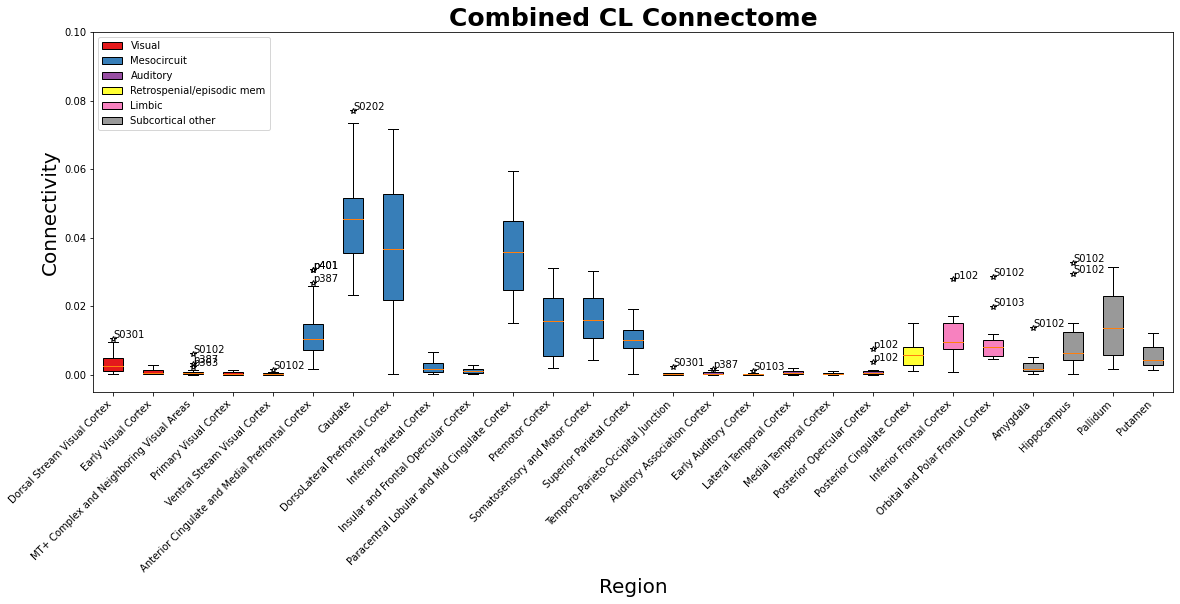


File exists, overwrite? (Y/N)
Y

File overwritten



In [481]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])

keys = []
for region in color_group["Grouping"].unique():
    keys.extend(sorted(color_group.loc[color_group["Grouping"]==region, "Region"].tolist()))

#keys = sorted(list(Combined.keys()))
#keys = Combined.keys()
print(keys)
xlabel = []
xlabellim = []

labels = []
patches = []

for i, key in enumerate(keys):
    if key == "Patient ID" or key == "Hemisphere": 
        continue 
    
    xlabellim.append(i)
    xlabel.append(key)
    
    label = color_group.loc[color_group["Region"]==key, "Grouping"].tolist()[0]
    bplot = standardErrorBox(i, Combined[key], color=cmap(UniqueGroups.index(label)), ax=ax)
    #bplot = standardErrorBox(i, Combined[Combined["Patient ID"] != 103][key], ax=ax)
    
    if not label in labels:
        labels.append(label)
        patches.append(bplot["boxes"][0])
    
    outliers = bplot['fliers'][0].get_ydata()
    if len(outliers) < 1:
        continue
    for val in outliers:
        outlier_look = Combined[Combined[key] == val]
        outlier_name = outlier_look['Patient ID']
        ax.text(i,val+0.0003,str(outlier_name.reset_index().loc[0][1]))

ax.set_xticks(xlabellim)
#ax.set_yticks(fontsize=15)
ax.set_xticklabels(xlabel,rotation=45, ha='right',fontsize=10)
ax.set_xlabel('Region',fontsize=20)
ax.set_ylabel('Connectivity',fontsize=20)
ax.set_title('START Stim Connectome',fontsize=25,fontweight='bold')
ax.set_ylim([-0.005,0.1])
ax.legend(patches, labels, loc='upper left')

#Comment block command is ctrl + /
# S0103 = Combined[Combined["Patient ID"] == 'S103']
# for i in range(2,S0103.shape[1]):
#     S0103_left = ax.plot(i,S0103[S0103['Hemisphere'] == 'Left'].iloc[0][i],marker='.',color='green',markersize=10)
#     S0103_right = ax.plot(i,S0103[S0103['Hemisphere'] == 'Right'].iloc[0][i],marker='.',color='red',markersize=10)
# ax.legend((S0103_left[0],S0103_right[0]),('Left','Right'),title='S103',fontsize=20,loc='upper left')

ax.grid(False)
#plt.style.use('classic')
plt.show()

figname = 'START_stim'
figpath = r'M:\MRtrix\Century/' + figname + '.png'

if os.path.isfile(figpath):
    #overwrite = "N"
    overwrite = input('\nFile exists, overwrite? (Y/N)\n')
    if overwrite.capitalize() in 'Yes':
        fig.savefig(figpath,dpi=400,bbox_inches='tight',facecolor='w')
        print('\nFile overwritten\n')
    else:
        print('\nFile will not be overwritten\n')
else:
    fig.savefig(figpath,dpi=400,bbox_inches='tight',facecolor='w')

['p102' 'p363' 'p380' 'p387' 'p401' 'S0301' 'S0201' 'S0202' 'S0102'
 'S0103']


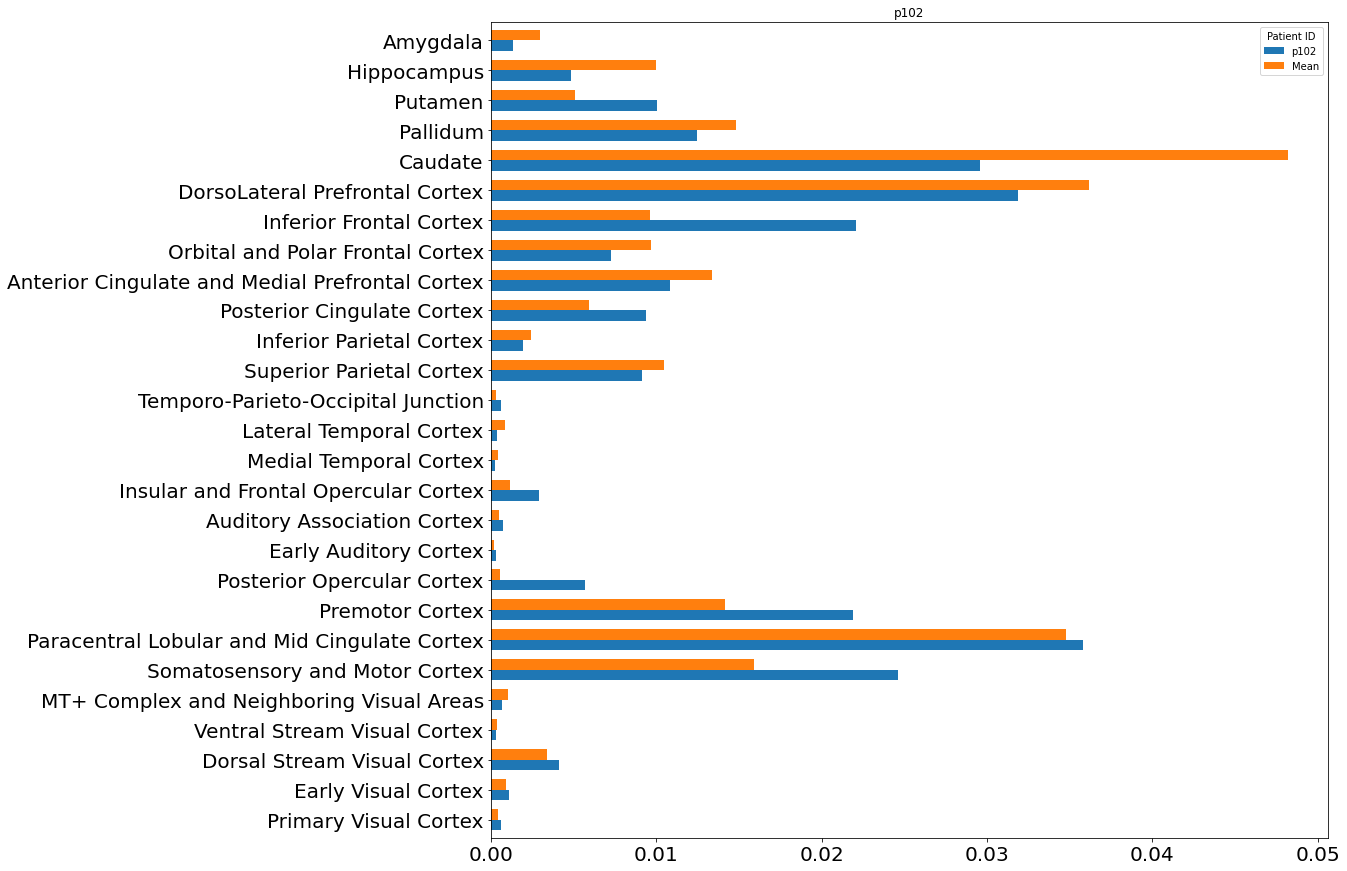

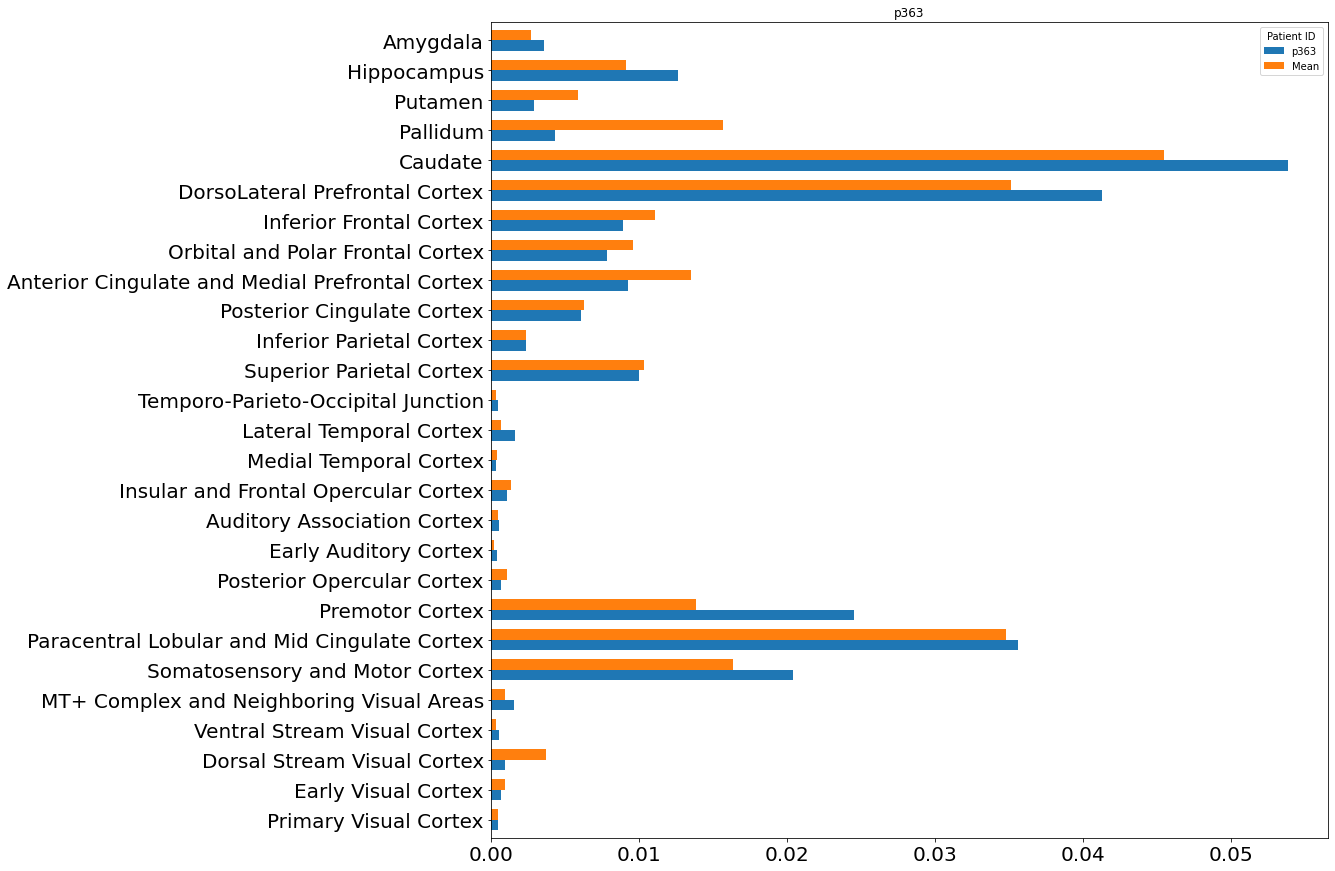

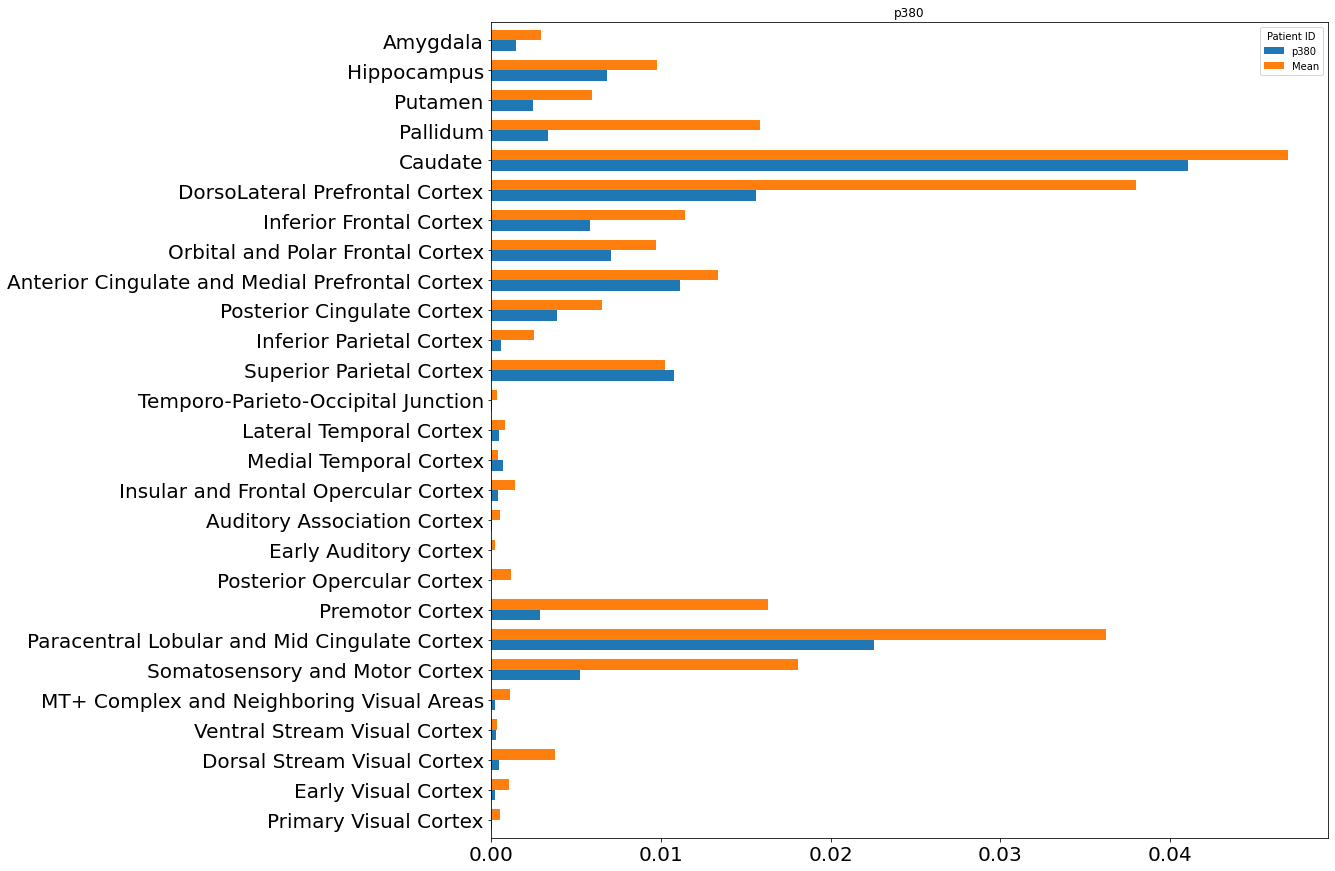

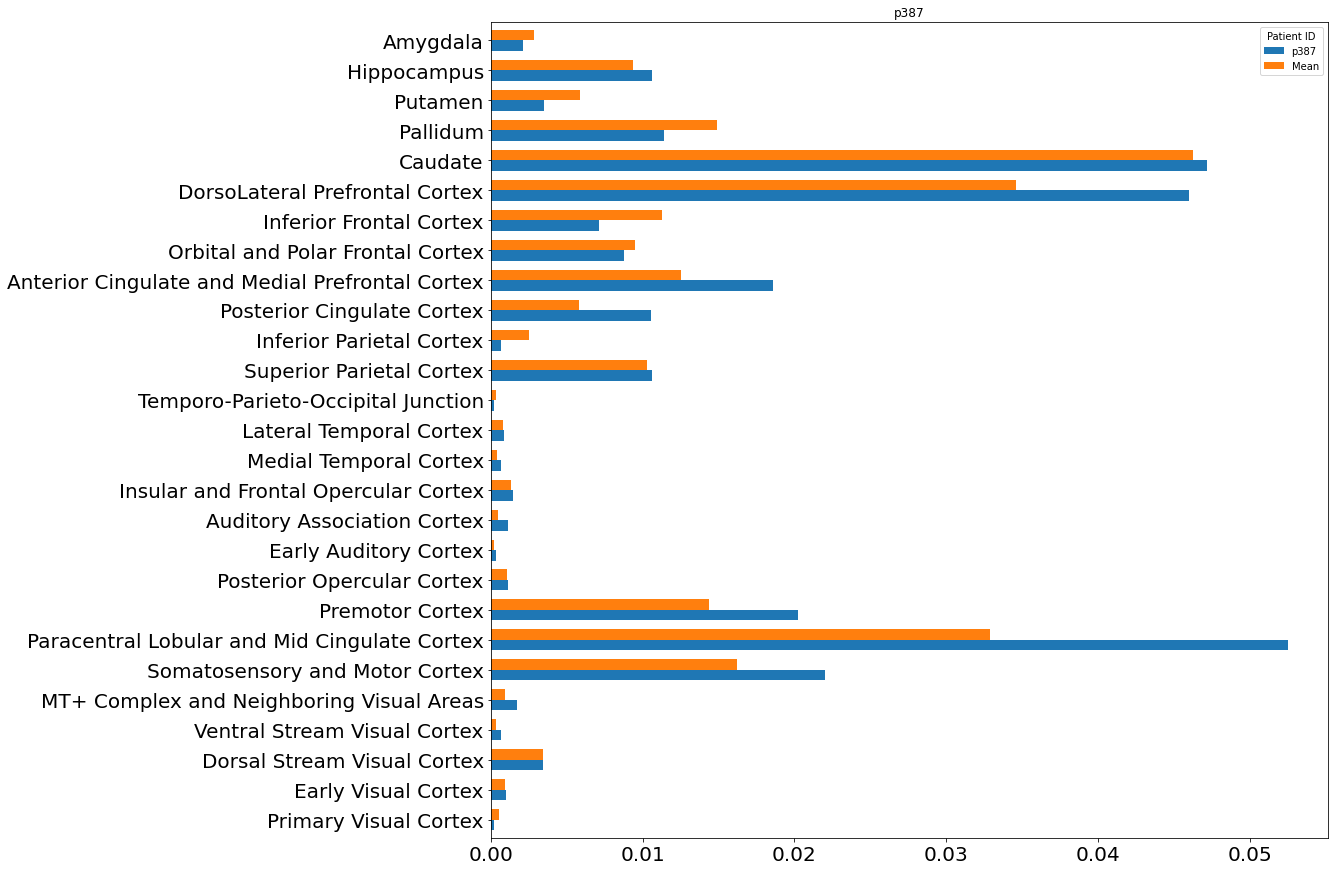

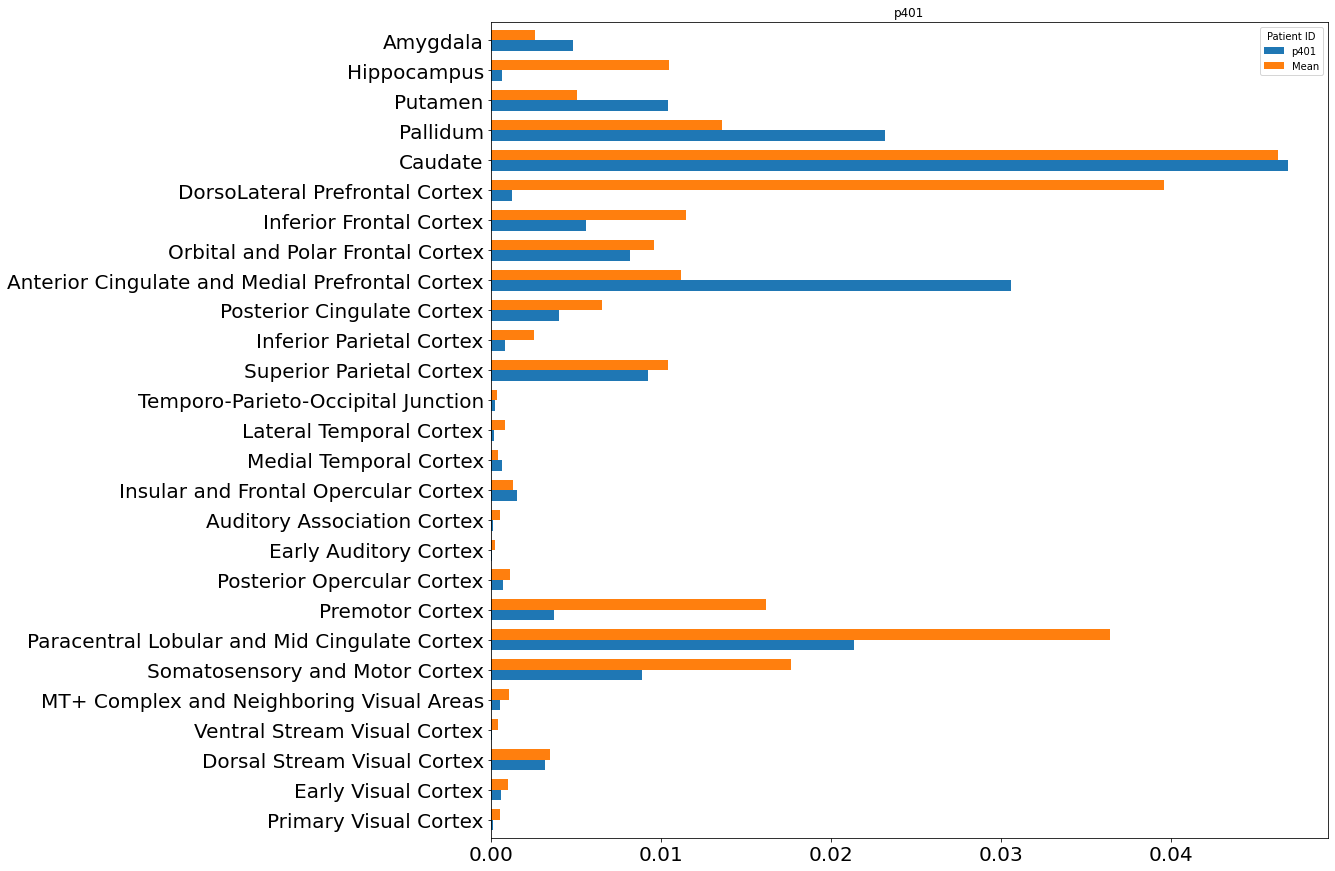

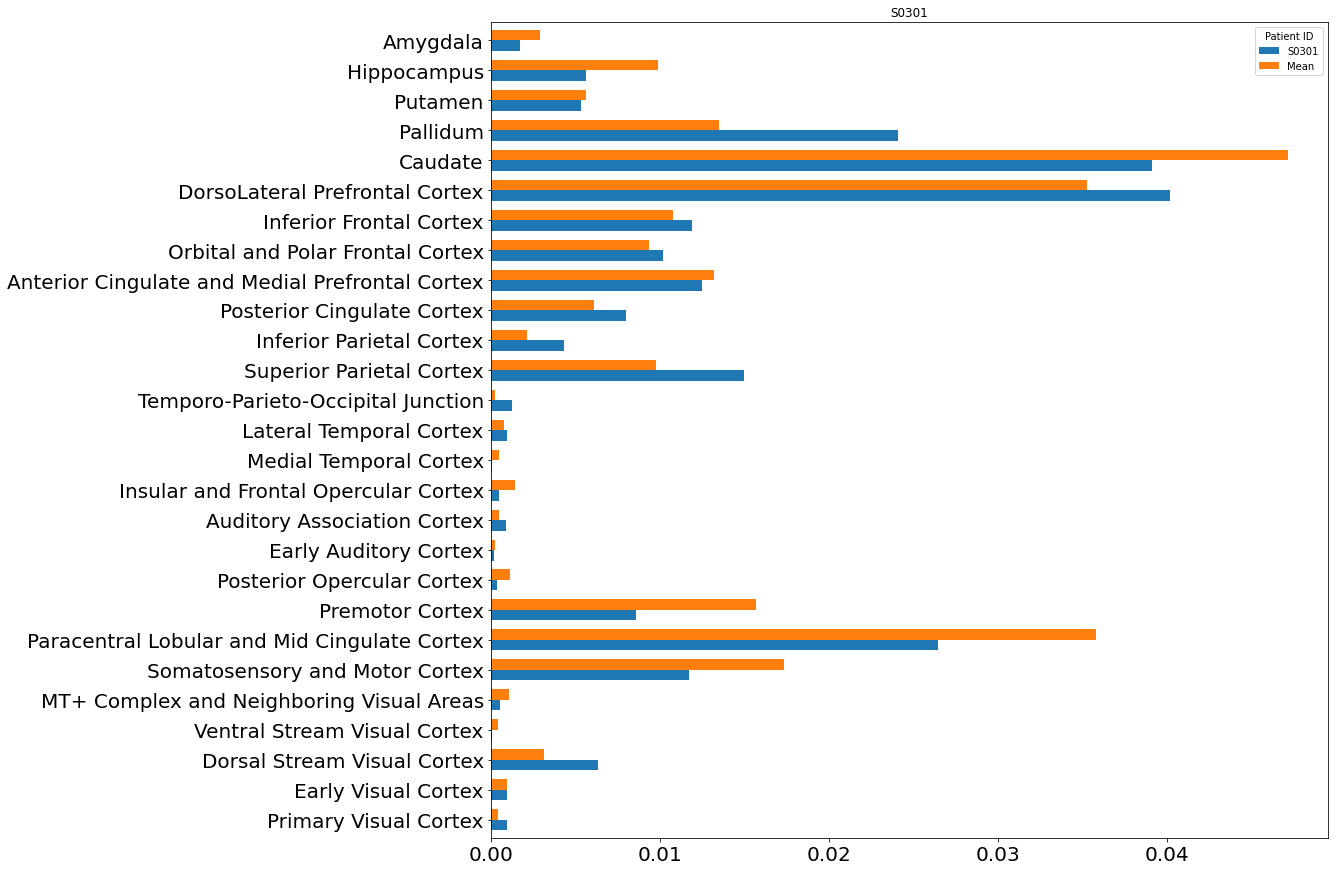

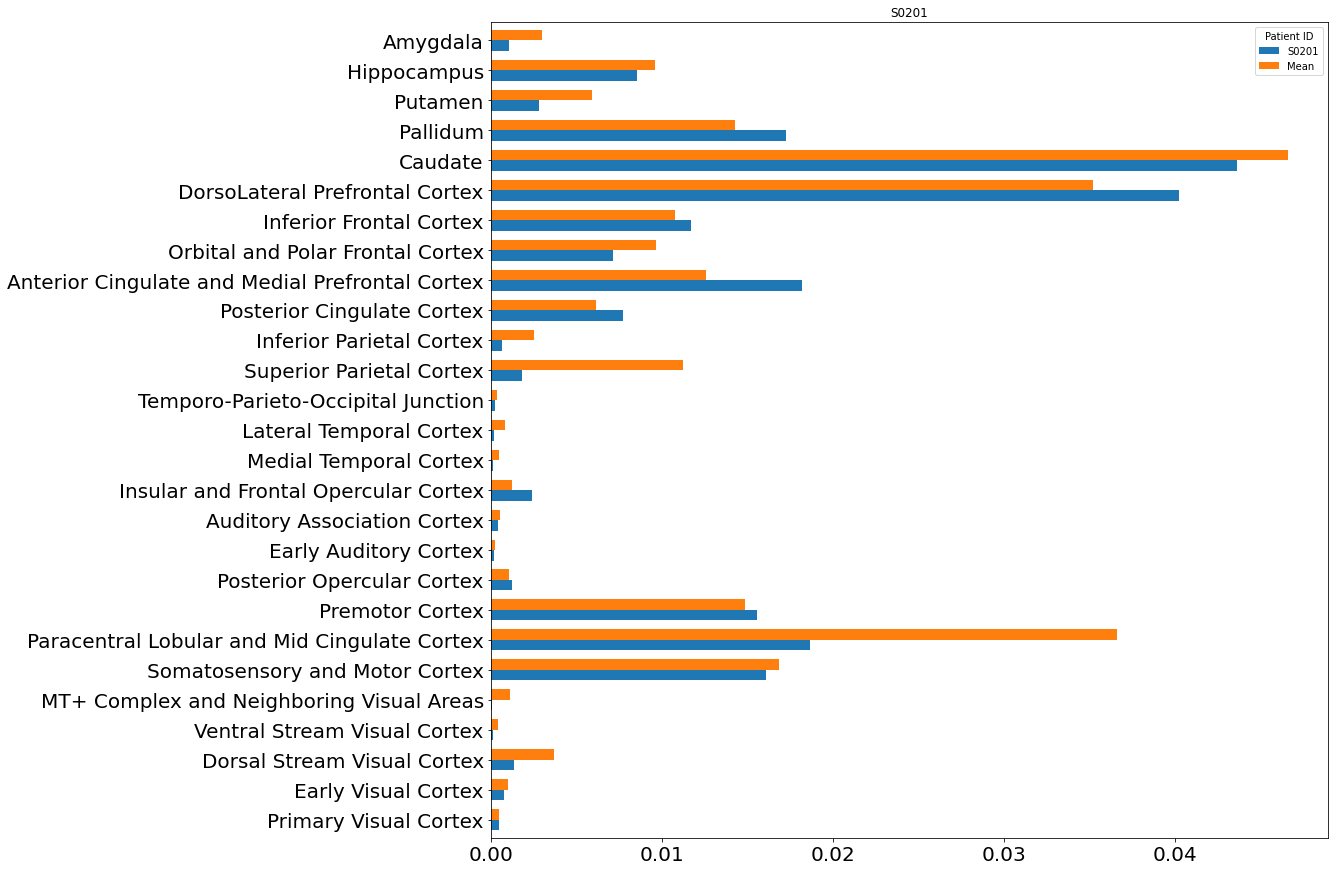

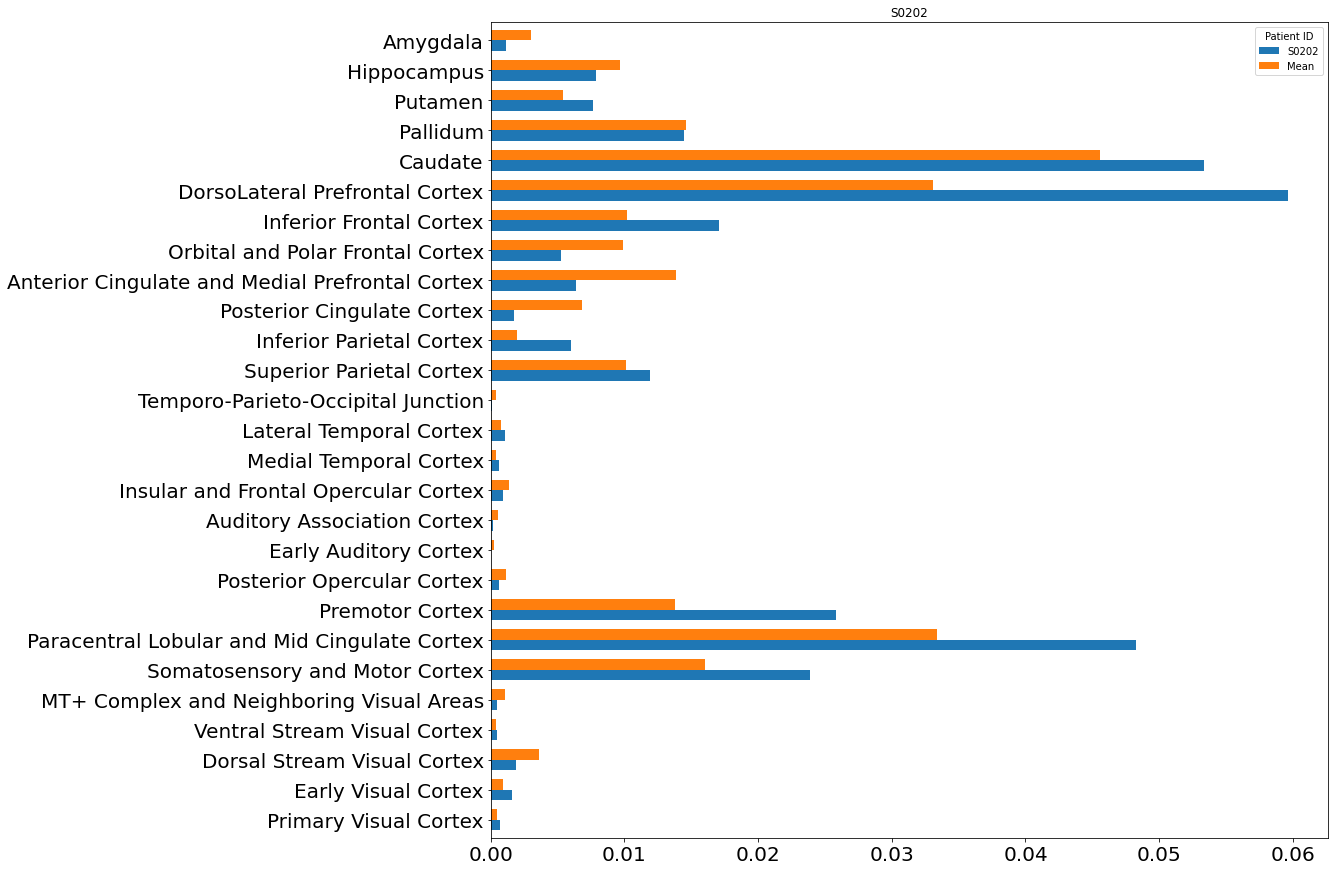

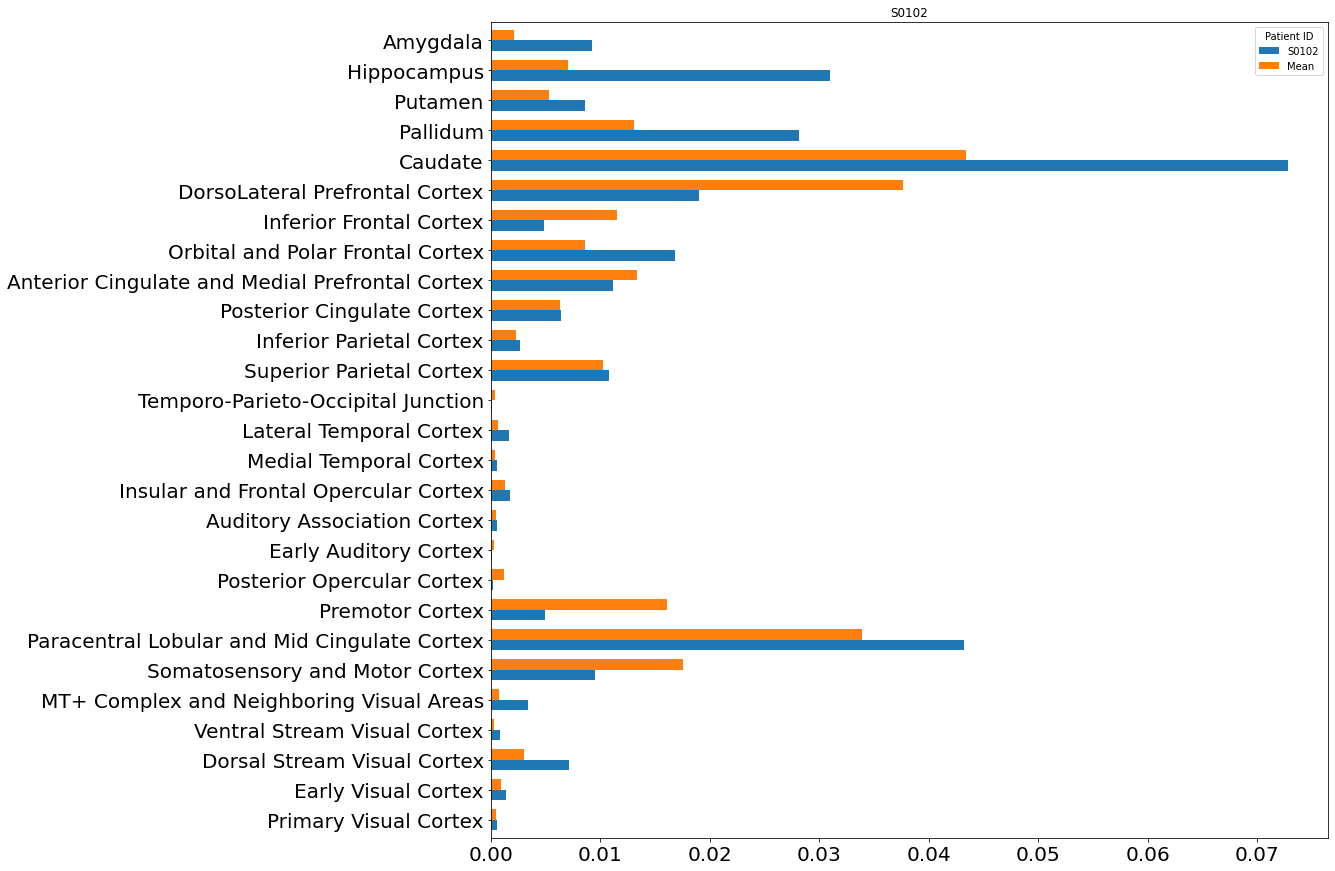

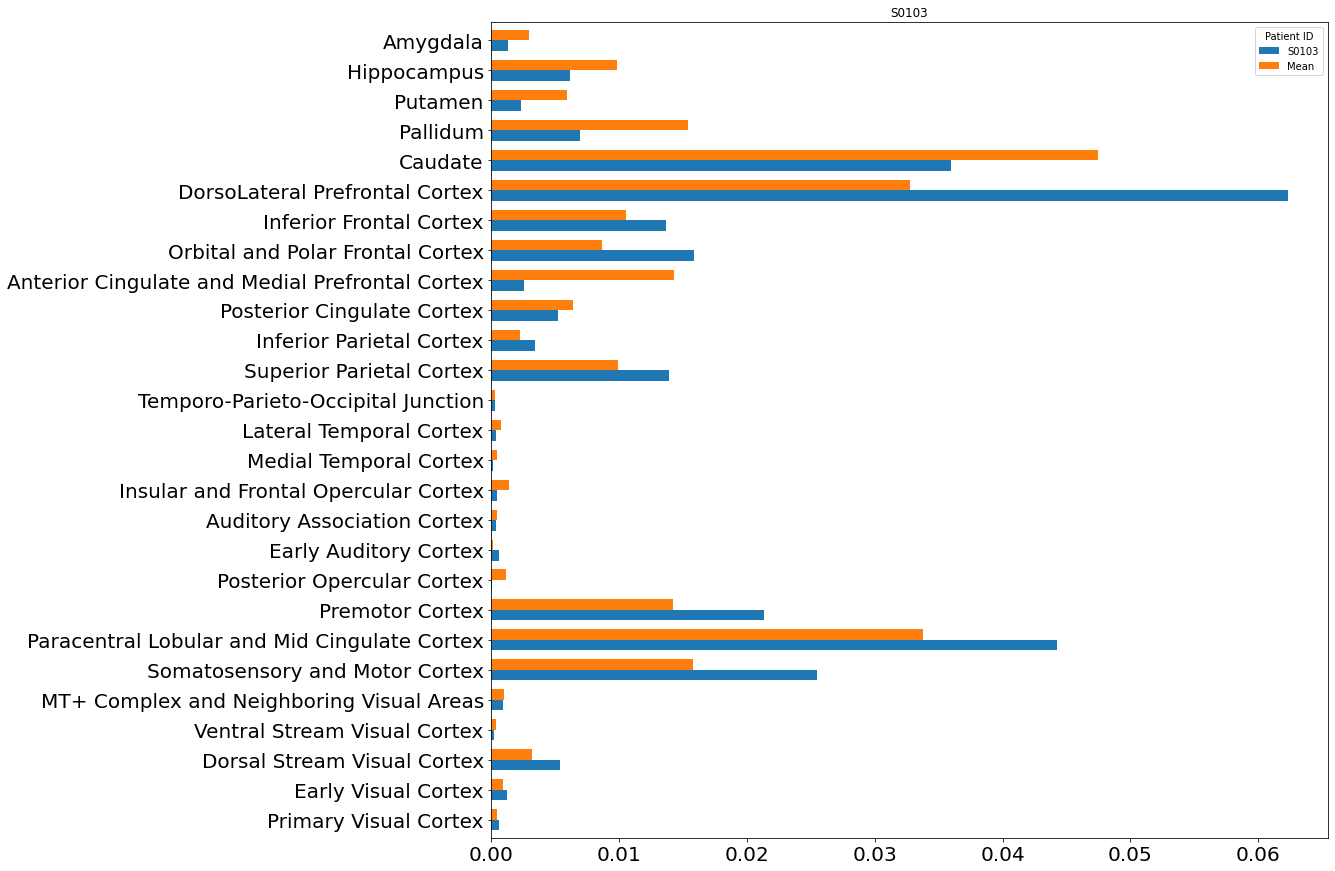

In [402]:
print(Combined["Patient ID"].unique())

for subject in Combined["Patient ID"].unique():
    leave1out = Combined[Combined["Patient ID"] != subject]
    subject_only = Combined[Combined["Patient ID"] == subject]
    leave_mean = leave1out.mean(axis=0,numeric_only=True).to_frame().transpose()
    leave_mean["Patient ID"] = 'Mean'
    subject_mean = subject_only.mean(axis=0,numeric_only=True).to_frame().transpose()
    subject_mean["Patient ID"] = subject
        
    avg_comp = pd.concat((subject_mean,leave_mean))
    avg_comp.set_index('Patient ID',inplace=True)
    #display(avg_comp)
    ax = avg_comp.transpose().plot(kind='barh',title=subject,figsize=(15,15),width=0.7,fontsize=20)

# for subject in Combined["Patient ID"].unique():
#     leave1out = Combined[Combined["Patient ID"] != subject]
#     left_mean = leave1out[leave1out["Hemisphere"] == 'Left'].mean(axis=0,numeric_only=True).to_frame().transpose()
#     left_mean["Patient ID"] = 'Mean'
#     left_mean["Hemisphere"] = 'Left'
#     right_mean = leave1out[leave1out["Hemisphere"] == 'Right'].mean(axis=0,numeric_only=True).to_frame().transpose()
#     right_mean["Patient ID"] = 'Mean'
#     right_mean["Hemisphere"] = 'Right'

#     avg_comp = pd.concat((Combined[Combined["Patient ID"] == subject],left_mean,right_mean))
#     display(avg_comp)


#ax = avg_comp.transpose().plot.bar(rot=90)